<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Future_Risk_prediction/DSGP_with_K_mean%2BDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
#mmount google drive with colab
drive.mount('/content/drive')

#loading the Dataset

df = pd.read_excel('/content/drive/MyDrive/DSGP/IMPORT STATISTICS - 2023.xlsx')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Displaying the dataset

df.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Unknown,2023.0,JANUARY,280110,BANGLADESH,Kg.,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
1,Unknown,2023.0,JANUARY,280110,INDIA,Kg.,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
2,Unknown,2023.0,JANUARY,280110,MALAYSIA,Kg.,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
3,Unknown,2023.0,FEBRUARY,280110,BANGLADESH,Kg.,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
4,Unknown,2023.0,FEBRUARY,280110,INDIA,Kg.,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine


In [67]:
#displaying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           292 non-null    object 
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1038 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 89.7+ KB


In [68]:
#Displaying the statistical summary of dataset
df.describe()

,YEAR,HSCODE,QUANTITY,VALUE_RS
count,292.000000,1.042000e+03,1.039000e+03,2.920000e+02
mean,2018.684932,9.093611e+08,4.241679e+04,3.693244e+06
std,3.409615,1.326227e+09,2.352492e+05,7.946637e+06
min,2016.000000,2.801100e+05,0.000000e+00,0.000000e+00
25%,2016.000000,2.808000e+07,3.500000e+01,1.900250e+01
50%,2016.000000,2.829110e+07,1.000000e+03,1.658700e+02
75%,2023.000000,2.801200e+09,1.989000e+04,4.316572e+06
max,2023.000000,3.102909e+09,4.000000e+06,4.727172e+07


In [69]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Categorical and the Numerical columns'
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01',
       'DESCRIPTION_02', 'DESCRIPTION_03'],
      dtype='object')

Numerical Columns:
Index(['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS'], dtype='object')


In [70]:
# Converting 'IMPORTER' and 'HSCODE' columns to string type
df['HSCODE'] = df['HSCODE'].astype(str)
df['IMPORTER'] = df['IMPORTER'].astype(str)

# Displaying the HSCODE column data type
print("Data Type of HSCODE Columns:")
print(df[['HSCODE']].dtypes)

print("Data Type of IMPORTER Columns:")
print(df[['IMPORTER']].dtypes)

Data Type of HSCODE Columns:
HSCODE    object
dtype: object
Data Type of IMPORTER Columns:
IMPORTER    object
dtype: object


In [71]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_cols:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(df[categorical_cols].dtypes)

Categorical Features:
- IMPORTER
- MONTH
- HSCODE
- COUNTRY
- UNIT
- DESCRIPTION_01
- DESCRIPTION_02
- DESCRIPTION_03

Data Type of Categorical Features:
IMPORTER          object
MONTH             object
HSCODE            object
COUNTRY           object
UNIT              object
DESCRIPTION_01    object
DESCRIPTION_02    object
DESCRIPTION_03    object
dtype: object


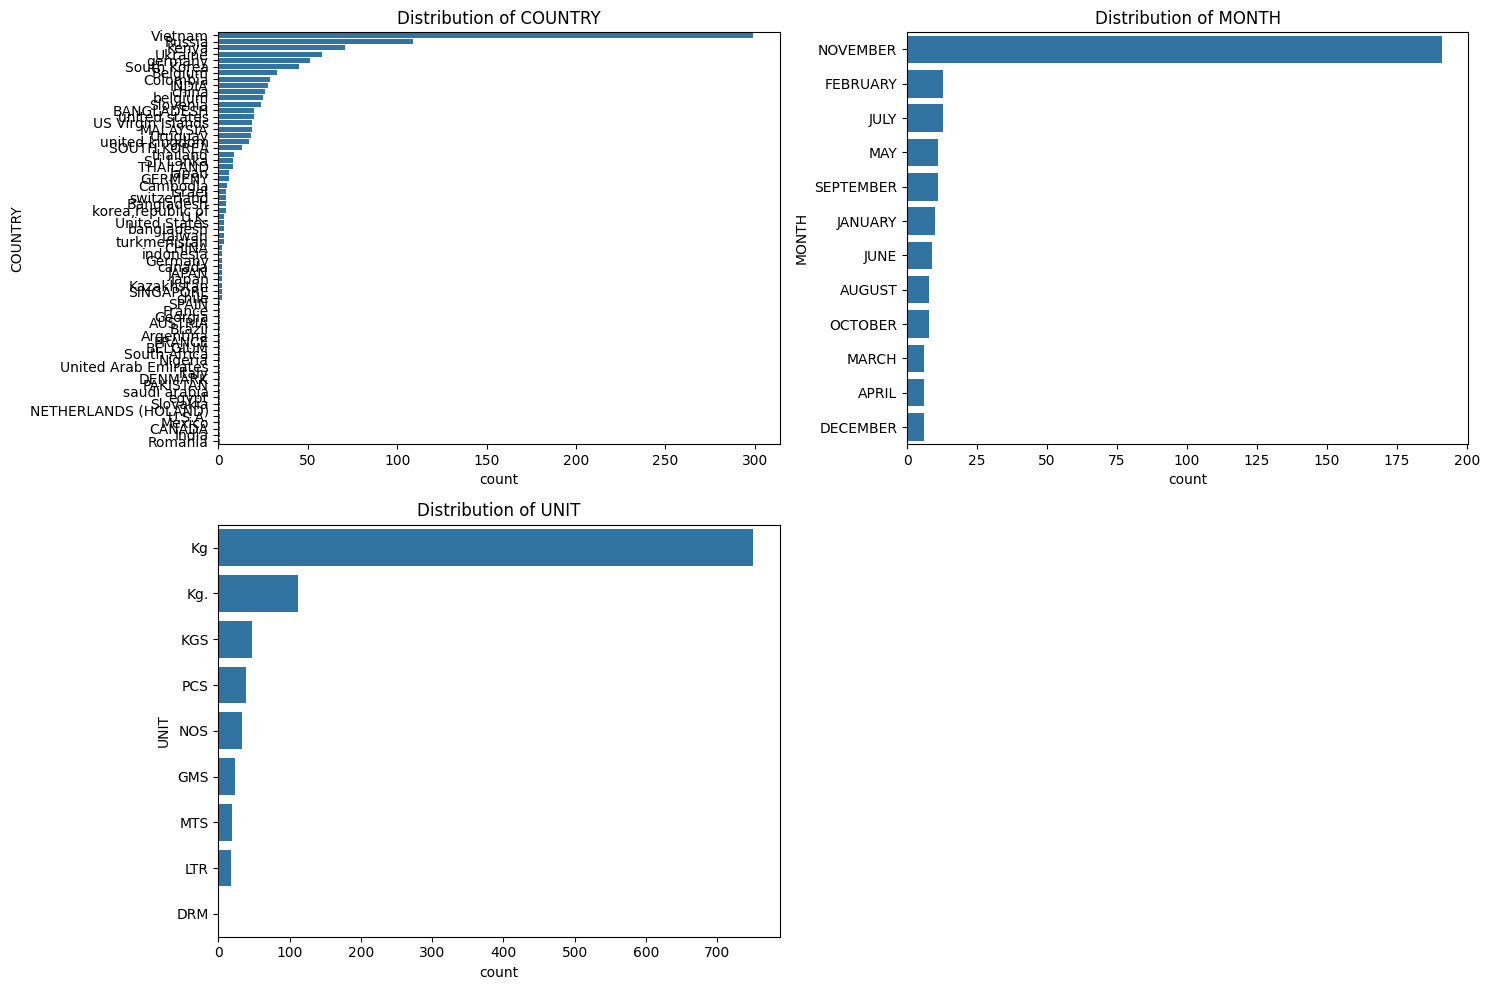

In [72]:
#Analyzing the cetagorical varibles
# Bar plots for categorical columns
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(y=df['COUNTRY'], order=df['COUNTRY'].value_counts().index)
plt.title('Distribution of COUNTRY')

plt.subplot(2, 2, 2)
sns.countplot(y=df['MONTH'], order=df['MONTH'].value_counts().index)
plt.title('Distribution of MONTH')

plt.subplot(2, 2, 3)
sns.countplot(y=df['UNIT'], order=df['UNIT'].value_counts().index)
plt.title('Distribution of UNIT')

plt.tight_layout()
plt.show()

In [73]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
U.S.A.       1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
UNIT
Kg     750
Kg.    112
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic comp

In [74]:

# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:
MONTH: 750
COUNTRY: 4


In [75]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_cols:
    unknown_count = (df[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:
IMPORTER: 1042


In [76]:
# List of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Displaying the numerical features
print("Numerical Features:")
for feature in numerical_cols:
    print(f"- {feature}")

# Display the data type of the numerical features
print("\nData Type of Numerical Features:")
print(df[numerical_cols].dtypes)

Numerical Features:
- YEAR
- QUANTITY
- VALUE_RS

Data Type of Numerical Features:
YEAR        float64
QUANTITY    float64
VALUE_RS    float64
dtype: object


In [77]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

YEAR
2016.0    180
2023.0    112
Name: count, dtype: int64
 
QUANTITY
1000.0     55
1.0        49
16200.0    40
5.0        31
27.0       28
           ..
204.0       1
23200.0     1
22820.0     1
22560.0     1
19050.0     1
Name: count, Length: 359, dtype: int64
 
VALUE_RS
0.40           4
53.79          3
188.55         3
0.20           3
21.15          2
              ..
350598.00      1
2213950.00     1
10318355.00    1
24988179.00    1
0.68           1
Name: count, Length: 263, dtype: int64
 


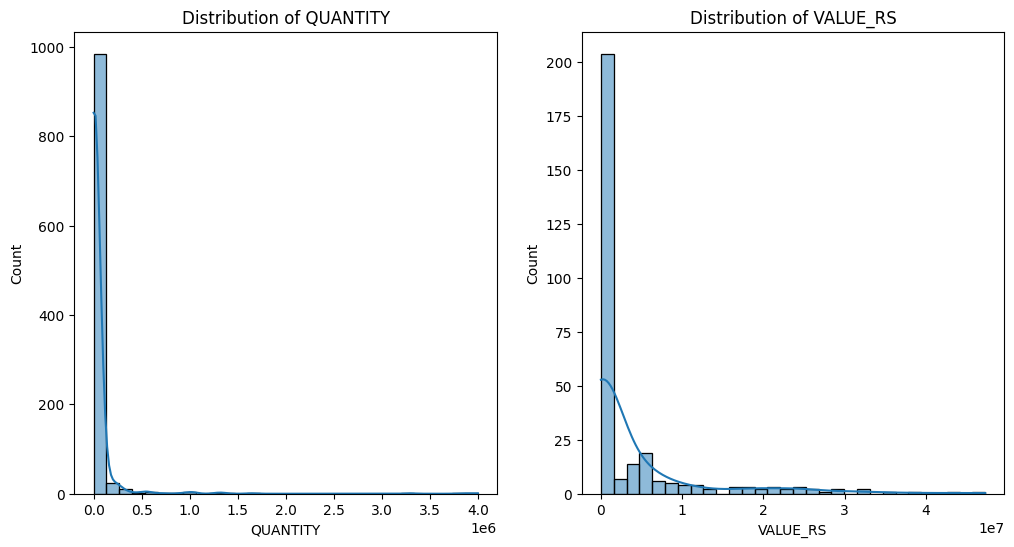

In [78]:
# checking data disstrubition
# Plot histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['QUANTITY'], kde=True, bins=30)
plt.title('Distribution of QUANTITY')

plt.subplot(1, 2, 2)
sns.histplot(df['VALUE_RS'], kde=True, bins=30)
plt.title('Distribution of VALUE_RS')

plt.show()

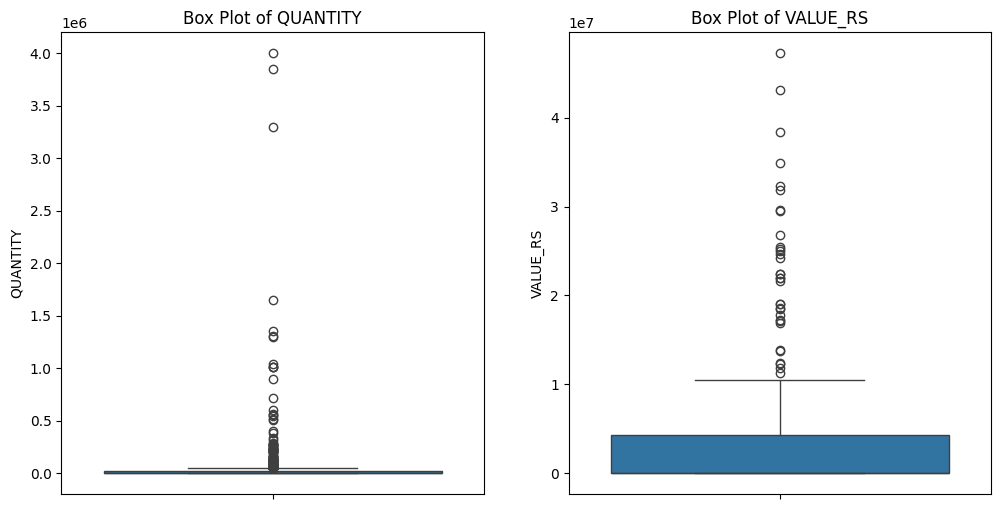

In [79]:
# checking for Outliers
# Box plots for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['QUANTITY'])
plt.title('Box Plot of QUANTITY')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['VALUE_RS'])
plt.title('Box Plot of VALUE_RS')

plt.show()

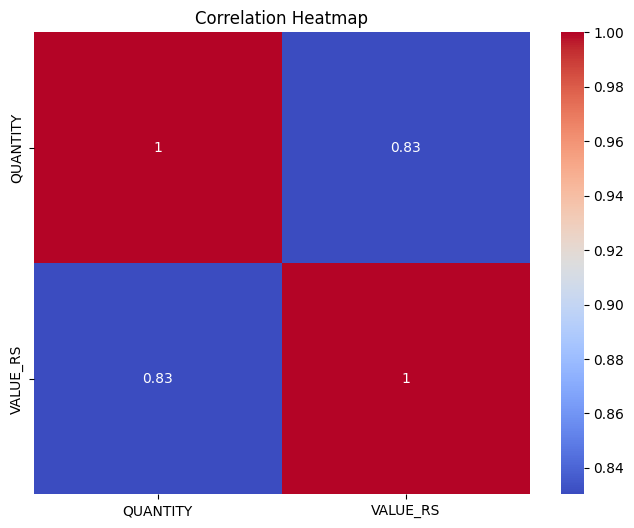

In [80]:
#Check Correlation Between Variables
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['QUANTITY', 'VALUE_RS']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [81]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")


Numerical columns with null values and their relevant counts:
YEAR: 750
QUANTITY: 3
VALUE_RS: 750


## Data Preprocessing

In [82]:
# Step 1: Removing whitespaces from the object type columns
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].apply(lambda x: x.str.strip())


In [83]:
# Step 2: Removing unnecessary full stops(".") from the categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.replace('.', ''))

In [84]:
# Define the average weight of one piece for PCS and NOS (update as needed)
average_piece_weight_kg = 1  # Default assumption (can be changed based on item type)

# Conversion mapping based on provided details
unit_conversion = {
    'KG': 1,           # Kg is already in Kg
    'KGS': 1,          # KGS is the same as Kg
    'Kg.': 1,          # Kg. is same as Kg
    'MTS': 1000,       # 1 Metric Ton (MTS) = 1000 Kg
    'GMS': 0.001,      # 1 Gram (GMS) = 0.001 Kg
    'LTR': 1,          # Assume 1 LTR = 1 Kg (change this for specific chemicals)
    'DRM': 200,        # Assuming 1 Drum (DRM) = 200 Kg (can be adjusted)
}

# Function to convert quantities to Kg and update UNIT and QUANTITY columns
def convert_and_update(row):
    unit = row['UNIT'].strip().upper()  # Standardize unit names

    # Handle Piece-based units (PCS, NOS)
    if unit in ['PCS', 'NOS']:
        row['UNIT'] = 'KG'  # Change unit to Kg
        row['QUANTITY'] = row['QUANTITY'] * average_piece_weight_kg  # Convert quantity to Kg

    # Handle other units by conversion factors
    elif unit in unit_conversion:
        row['UNIT'] = 'KG'  # Change unit to Kg
        row['QUANTITY'] = row['QUANTITY'] * unit_conversion[unit]  # Convert quantity to Kg

    return row

# Apply the conversion and update the dataset
df = df.apply(convert_and_update, axis=1)

# Check the resulting dataframe
print(df[['UNIT', 'QUANTITY']].head())


  UNIT  QUANTITY
0   KG  131600.0
1   KG   37800.0
2   KG   12090.0
3   KG   25200.0
4   KG   75599.0


In [85]:
# Step 3: Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
df['COUNTRY'] = df['COUNTRY'].str.upper()
df['UNIT'] = df['UNIT'].str.upper()

# Displaying the modified dataset
print(df)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [86]:
# Calculate the correlation matrix of missing values
missing_corr = df.isnull().corr()

# Print the correlation matrix
print(missing_corr)


                IMPORTER      YEAR     MONTH  HSCODE   COUNTRY  UNIT  \
IMPORTER             NaN       NaN       NaN     NaN       NaN   NaN   
YEAR                 NaN  1.000000  1.000000     NaN  0.038734   NaN   
MONTH                NaN  1.000000  1.000000     NaN  0.038734   NaN   
HSCODE               NaN       NaN       NaN     NaN       NaN   NaN   
COUNTRY              NaN  0.038734  0.038734     NaN  1.000000   NaN   
UNIT                 NaN       NaN       NaN     NaN       NaN   NaN   
QUANTITY             NaN  0.033528  0.033528     NaN -0.003336   NaN   
VALUE_RS             NaN  1.000000  1.000000     NaN  0.038734   NaN   
DESCRIPTION_01       NaN       NaN       NaN     NaN       NaN   NaN   
DESCRIPTION_02       NaN       NaN       NaN     NaN       NaN   NaN   
DESCRIPTION_03       NaN       NaN       NaN     NaN       NaN   NaN   

                QUANTITY  VALUE_RS  DESCRIPTION_01  DESCRIPTION_02  \
IMPORTER             NaN       NaN             NaN             Na

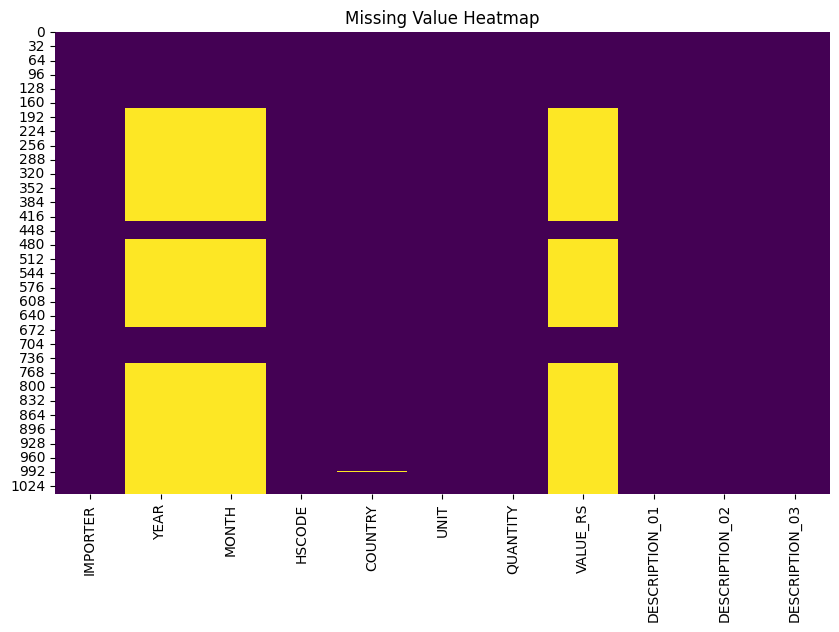

In [87]:
# Analzing missing values
# Missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

YEAR, MONTH, and VALUE_RS have a correlation of 1.0, meaning they always have missing values together.
Other columns mostly show NaN, meaning no meaningful correlation in missing values.

In [88]:
# handling missing values

# Fill missing numerical columns with the median
df['QUANTITY'] = df['QUANTITY'].fillna(df['QUANTITY'].median())

# Fill missing categorical column with 'Unknown'
df['COUNTRY'] = df['COUNTRY'].fillna('Unknown')




In [89]:
import pandas as pd
from sklearn.impute import KNNImputer

# Impute YEAR using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df["YEAR"] = knn_imputer.fit_transform(df[["YEAR"]])

# Output for YEAR
print("Unique values in YEAR after imputation:\n", df["YEAR"].value_counts())


Unique values in YEAR after imputation:
 YEAR
2018.684932    750
2016.000000    180
2023.000000    112
Name: count, dtype: int64


In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Encode COUNTRY column to numeric values
df["COUNTRY"] = df["COUNTRY"].astype("category").cat.codes



# Features to be used for imputation
features = ["HSCODE", "QUANTITY", "COUNTRY"]

# Impute MONTH using RandomForestClassifier
known = df[df["MONTH"].notnull()]
unknown = df[df["MONTH"].isnull()]

X_train = known[features]
y_train = known["MONTH"]
X_test = unknown[features]

month_model = RandomForestClassifier(n_estimators=100, random_state=42)
month_model.fit(X_train, y_train)

df.loc[df["MONTH"].isnull(), "MONTH"] = month_model.predict(X_test)

# Output for MONTH
print("\nUnique values in MONTH after imputation:\n", df["MONTH"].value_counts())



Unique values in MONTH after imputation:
 MONTH
NOVEMBER     941
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64


In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Encode COUNTRY column to numeric values
df["COUNTRY"] = df["COUNTRY"].astype("category").cat.codes


# Impute VALUE_RS using RandomForestRegressor
for col in ["VALUE_RS"]:
    known = df[df[col].notnull()]
    unknown = df[df[col].isnull()]

    X_train = known[features]
    y_train = known[col]

    X_test = unknown[features]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    df.loc[df[col].isnull(), col] = model.predict(X_test)

# Output for VALUE_RS
print("\nUnique values in VALUE_RS after imputation:\n", df["VALUE_RS"].value_counts())



Unique values in VALUE_RS after imputation:
 VALUE_RS
44.300600     27
40.063025     25
203.559731    24
355.424400    23
57.725610     23
              ..
1.770000       1
590.610000     1
62.110000      1
20.710000      1
69.972475      1
Name: count, Length: 477, dtype: int64


In [92]:
# Drop the 'IMPORTER' column as it's not contributing meaningful data
df.drop(columns=['IMPORTER'], inplace=True)

In [93]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
HSCODE,0
COUNTRY,0
UNIT,0
QUANTITY,0
VALUE_RS,0
DESCRIPTION_01,0
DESCRIPTION_02,0
DESCRIPTION_03,0


In [94]:

# Combine all DESCRIPTION columns into one
df['DESCRIPTION'] = df['DESCRIPTION_01'] + ' ' + df['DESCRIPTION_02'] + ' ' + df['DESCRIPTION_03']

# Vectorize the combined DESCRIPTION column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_desc = vectorizer.fit_transform(df['DESCRIPTION'])

In [95]:
# Drop the original DESCRIPTION columns after combining them
df.drop(columns=['DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03'], inplace=True)

df.head()

,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION
0,2023.0,JANUARY,280110,2,KG,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...
1,2023.0,JANUARY,280110,16,KG,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...
2,2023.0,JANUARY,280110,24,KG,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...
3,2023.0,FEBRUARY,280110,2,KG,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...
4,2023.0,FEBRUARY,280110,16,KG,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...


In [96]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
df_scaled = df[['QUANTITY', 'VALUE_RS']]

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

print(df_scaled)


[[-0.03001817  2.84241483]
 [-0.03590343  0.63712574]
 [-0.03751654  0.96192826]
 ...
 [-0.03820106 -0.23253598]
 [-0.03820106 -0.23253598]
 [-0.03725867 -0.23258143]]


In [97]:
from scipy.sparse import hstack

# Combine TF-IDF features and scaled numerical features
X = hstack([X_desc, df_scaled])  # hstack combines sparse and dense matrices


In [98]:
from sklearn.cluster import KMeans

# Apply K-Means clustering to classify chemicals into risk categories (example: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# Check the Silhouette Score for K-Means
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, df['KMeans_Cluster'])
print("K-Means Silhouette Score: ", sil_score)


K-Means Silhouette Score:  0.7577518225874808


In [99]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering to detect new chemicals or outliers
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Handle DBSCAN output, where -1 represents noise (outliers)
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].apply(lambda x: 'New Chemical' if x == -1 else 'Known Chemical')


In [100]:
# List of chemicals that are highly dangerous
high_risk_chemicals = [
    'Chlorine', 'Cyanides', 'Fluorine Compounds', 'Chlorates', 'Perchlorates',
    'Bromates', 'Sulphuric Acid', 'Nitric Acid', 'Bromine', 'Iodine',
    'Hydrogen Peroxide', 'Halides', 'Sarin', 'Tabun', 'Soman', 'Cyclosarin',
    'VX', 'Mustard Gas', 'Lewisite', 'Phosgene', 'Chloropicrin',
    'Hydrogen Cyanide', 'Cyanogen Chloride', 'Adamsite', '3-Quinuclidinyl Benzilate',
    'Ricin', 'Saxitoxin'
]

# Rule-based risk assignment
def assign_risk(row):
    if row['DBSCAN_Cluster'] == 'New Chemical':
        if row['QUANTITY'] > 50000:
            return 'High Risk'
        else:
            return 'Medium Risk'
    elif row['KMeans_Cluster'] == 0:  # Low-risk chemicals
        return 'Low Risk'
    elif row['KMeans_Cluster'] == 1:  # Medium-risk chemicals
        return 'Medium Risk'
    elif row['KMeans_Cluster'] == 2:  # High-risk chemicals
        return 'High Risk'

    # Check for high-risk chemicals
    if any(chemical in row['DESCRIPTION'] for chemical in high_risk_chemicals):
        if row['QUANTITY'] > 50000:
            return 'High Risk'
        else:
            return 'Medium Risk'

    return 'Low Risk'

# Apply risk function to each row
df['Risk_Level'] = df.apply(assign_risk, axis=1)


In [101]:
from google.colab import files

# Save the dataframe as a CSV file
df.to_csv('chemical_risk_prediction.csv', index=False)

# Trigger the download
files.download('chemical_risk_prediction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:


# Load the saved CSV to check the data
df_final = pd.read_csv('chemical_risk_prediction.csv')

# Display the first few rows to check the data
print(df_final.head())


     YEAR     MONTH  HSCODE  COUNTRY UNIT  QUANTITY    VALUE_RS  \
0  2023.0   JANUARY  280110        2   KG  131600.0  13877114.0   
1  2023.0   JANUARY  280110       16   KG   37800.0   3924989.0   
2  2023.0   JANUARY  280110       24   KG   12090.0   5390772.0   
3  2023.0  FEBRUARY  280110        2   KG   25200.0   3089445.0   
4  2023.0  FEBRUARY  280110       16   KG   75599.0   6939860.0   

                                         DESCRIPTION  KMeans_Cluster  \
0  Inorganic chemicals; Organic or inorganic comp...               2   
1  Inorganic chemicals; Organic or inorganic comp...               0   
2  Inorganic chemicals; Organic or inorganic comp...               0   
3  Inorganic chemicals; Organic or inorganic comp...               0   
4  Inorganic chemicals; Organic or inorganic comp...               0   

   DBSCAN_Cluster Risk_Level  
0    New Chemical  High Risk  
1  Known Chemical   Low Risk  
2  Known Chemical   Low Risk  
3  Known Chemical   Low Risk  
4  Known 

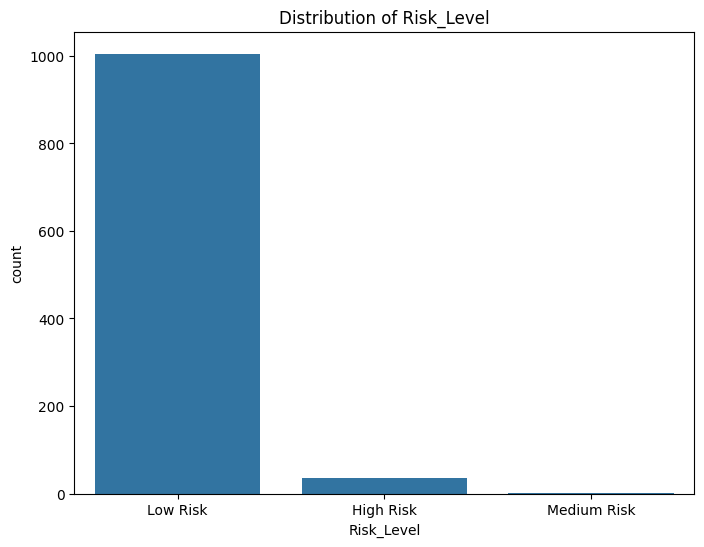

In [103]:
#Explore Target Variable (Risk_Level)
# Bar plot for Risk_Level
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Risk_Level'], order=df['Risk_Level'].value_counts().index)
plt.title('Distribution of Risk_Level')
plt.show()

In [104]:
risk = df_final['Risk_Level'].value_counts()
print(risk)

Risk_Level
Low Risk       1005
High Risk        35
Medium Risk       2
Name: count, dtype: int64
